<div style="text-align: left;">
<table style="width:100%; background-color:transparent;">
  <tr style="background-color:transparent;">
    <td style="background-color:transparent;"><img src="http://project.inria.fr/saclaycds/files/2017/02/logoUPSayPlusCDS_990.png" width="70%">
    </td>
  </tr>
</table> 
</div>


# Data Camp business case on predicting pollution peaks
  
Antoine Hoo, Robin Fuchs, Alexis Sair, Enzo Terreau, Nicolas Toussaint, Ambroise Coulomb

## Table of Contents

<p><div class="lev2 toc-item"><a href="#Introduction" data-toc-modified-id="Introduction-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Introduction</a></div><div class="lev2 toc-item"><a href="#The-data" data-toc-modified-id="The-data-1.3"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>The data</a></div><div class="lev3 toc-item"><a href="#Generalities" data-toc-modified-id="Generalities"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Generalities</a></div><div class="lev3 toc-item"><a href="#The-duration-of-events" data-toc-modified-id="The-duration-of-events-1.3.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>The duration of events</a></div><div class="lev3 toc-item"><a href="#Analysis-of-the-quantitative-features" data-toc-modified-id="Analysis-of-the-quantitative-features-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Analysis of the quantitative features</a></div><div class="lev3 toc-item"><a href="#Features-importances" data-toc-modified-id="Testing-data-1.3.5"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Features importances</a></div><div class="lev2 toc-item"><a href="#Workflow" data-toc-modified-id="Workflow-1.4"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Workflow</a></div><div class="lev2 toc-item"><a href="#The-model-to-submit" data-toc-modified-id="Workflow-1.4"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>The model to submit</a></div>

## Introduction

PM2.5 particles are fine particles particularly harmful to health. They are smaller than 2.5 micrometres (0.0025 mm) in diameter and up to 30 times smaller than the width of a human hair causing heart or lung conditions (including asthma). As such, they are under scrutiny of China, particularly concerned with pollution issues.
  
Given the issues triggered by the pollution smogs, China has launched a war on pollution in 2013.  Since then, results are impressive: a drop by nearly 30% in the level of PM2.5 fine particles. However, the concentration of PM2.5 particles in the air is still barely three times higher than the ”acceptable” threshold set by the WHO. 
  
Motor vehicles, power plant emissions and bushfires are all major sources of fine particles (The main determinants of the PM2.5 pollution have been identified in X. Liang & al. "Assessing Beijing’s PM2.5 pollution: severity, weather impact, APEC and winter heating" (2015). The authors have implemented an econometric analysis and came up to the conclusion that coal-based heating systems were responsible for a substantial part of the air pollution and that Beijing (and China as a whole) would gain from switching to cleaner heating production processes). 

On days where PM2.5 reach a peak, the bureau in charge of environmental issues has therefore taken over the years some drastic measures  such as temporary closing of some coal-based heating firms or limiting the number of cars that could drive depending on the level of PM2.5 (source).In  those  situations,  citizens  have  turned  to  public  transportation  systems,  creating  very strong flows that the company in charge of transportation had to handle; but with difficulty. 
  
Adapting the number of trains in circulation or the schedules of the drivers cannot be done instantaneously. Being able to predict pollution peaks in the forthcoming days is therefore key for the company.

The goal of this case study is to predict pollution levels of PM2.5.

Errors in prediction are typically costly both ways. Predicting a peak of pollution when there will be none causes too many trains to circulate and too many drivers to work, which might be very costly for the firm. On the contrary, not anticipating a pollution episode leads to a chaotic traffic, crowded train-stations and other problematic issues. We would like to convert eventually the costs in both situations to a corresponding money amount and consider that too optimistic predictions lead to more costly mistakes than too pessimistic predictions. 

The Beijing authorities have defined the following pollution levels: 

   
    Between 0 ug/m3 and 50 ug/m3 the air quality is regarded as "Good"
    Between 50 and 150 ug/m3 as "Moderately polluted"
    Between 150 and 200 ug/m3 as "Heavily polluted" 
    Between 200 and 300 ug/m3 as "Severely polluted"
    Over 300 ug/m3 the air quality is considered as "Critic" 


A proportion of cars inversely proportional to the level of pollution observed each half-day is allowed to be driven and we suppose for simplification purpose that each person that could not drive will take the public transportation system, an hypothesis that might be relaxed later on. 

The data gathered come from the Center for [Statistical Science of Peking University](https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data?fbclid=IwAR1OwLOLcPYuJec8pQgJNtT_BrwrcryhmI-HT8FJLXn8EqkQCmM5a7cvbhg#). These data are hourly data from 2010 to 2014 and consist of 11 variables in addition of the PM2.5 concentration in the air.

The variables are the following :
The hour, day, month and year of the observation, the Dew Point (DEWP), the temperature  in celsius degrees? (TEMP), the pressure in hPa (PRES), the combined wind direction (cbwd), the cumulated wind speed in m/s (Iws), the cumulated hours of snow (Is) and the cumulated hours of rain (Ir).

Other variables could be collected/estimated to enrich the model.

# The data

## Generalities

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
import problem
from IPython.display import Latex

In [2]:
X_train, y_train = problem.get_train_data()

In [3]:
print('X_train shape : {}'.format(X_train.shape))
print('y_train shape : {}'.format(y_train.shape))

X_train shape : (28756, 11)
y_train shape : (28756,)


In [4]:
X_train.columns

Index(['year', 'month', 'day', 'hour', 'DEWP', 'TEMP', 'PRES', 'cbwd', 'Iws',
       'Is', 'Ir'],
      dtype='object')

In [5]:
X_train.head()

,year,month,day,hour,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
2010-01-02 00:00:00,2010,1,2,0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,2010,1,2,1,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,2010,1,2,2,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,2010,1,2,3,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,2010,1,2,4,-7,-5.0,1022.0,SE,6.25,2,0


Let 's look at the metadata we have :

- No: row number 
- year: year of data in this row 
- month: month of data in this row 
- day: day of data in this row 
- hour: hour of data in this row 
- pm2.5: PM2.5 concentration (ug/m^3) 
- DEWP: Dew Point (â„ƒ) 
- TEMP: Temperature (â„ƒ) 
- PRES: Pressure (hPa) 
- cbwd: Combined wind direction 
- Iws: Cumulated wind speed (m/s) 
- Is: Cumulated hours of snow 
- Ir: Cumulated hours of rain

In [6]:
print('Number of different values taken by each feature :')
for col in X_train.columns :
    print("\t", col, ":", X_train[col].unique().size)

Number of different values taken by each feature :
	 year : 4
	 month : 12
	 day : 31
	 hour : 24
	 DEWP : 58
	 TEMP : 61
	 PRES : 59
	 cbwd : 4
	 Iws : 2384
	 Is : 28
	 Ir : 37


In [7]:
type(y_train)

numpy.ndarray

In [8]:
# Building the full dataset
full_train = X_train.copy()
full_train["pm2.5"] = y_train

In [9]:
quant_cols = ['pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir']
data_quant = full_train[quant_cols]
cat_cols = [col for col in full_train.columns if col not in quant_cols]
data_cat = full_train[cat_cols]

# The duration of events

### Analysis of the target with respect to the time

### Let's have a look at the evolution of pm2.5 during a day

/home/nicolas/anaconda3/envs/china-pollution/lib/python3.7/site-packages/pandas/plotting/_core.py:998: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=733774.0, right=733774.0
  ax.set_xlim(left, right)


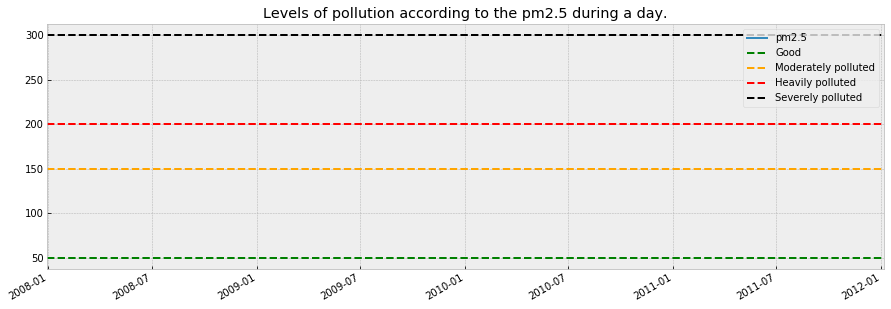

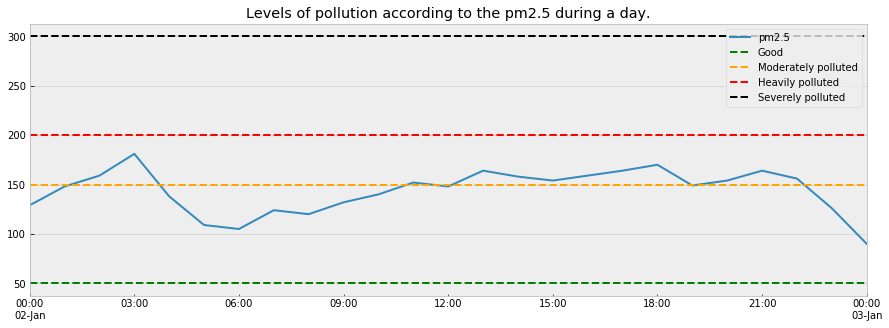

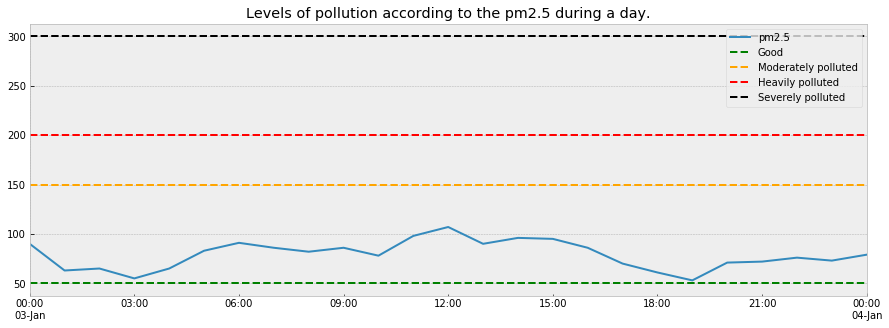

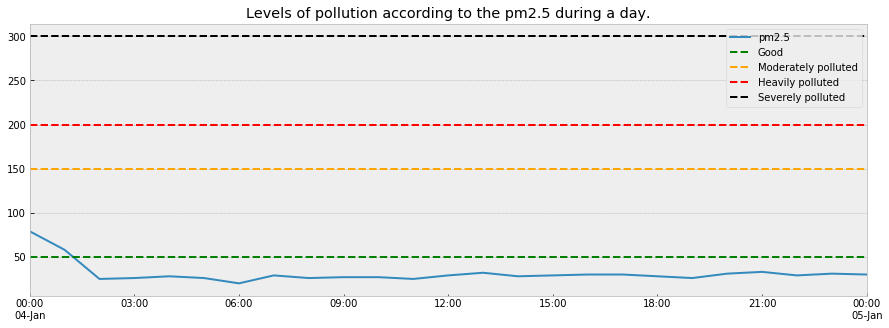

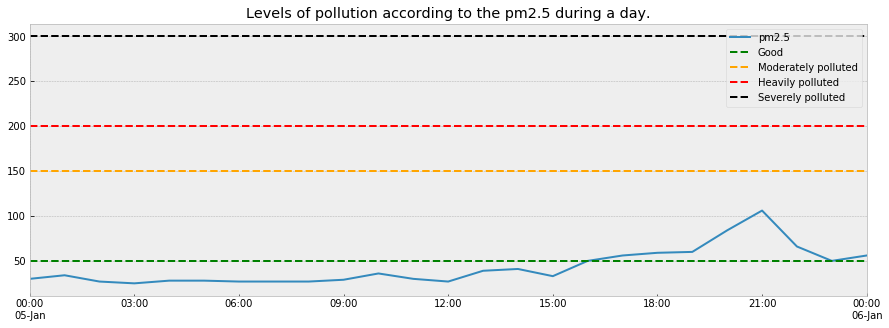

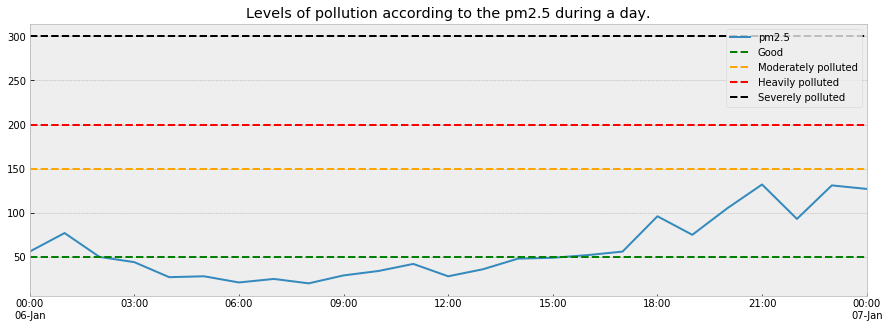

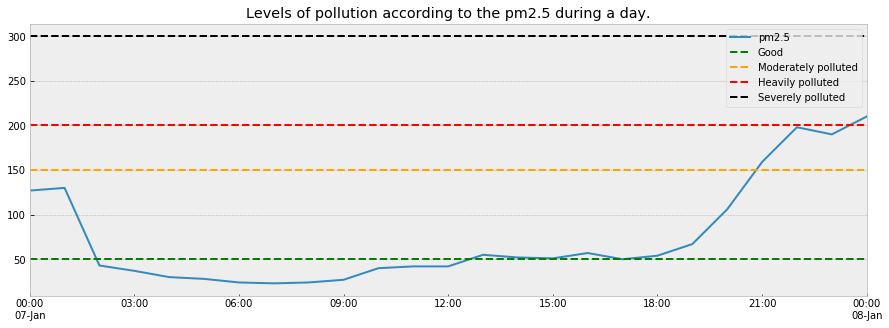

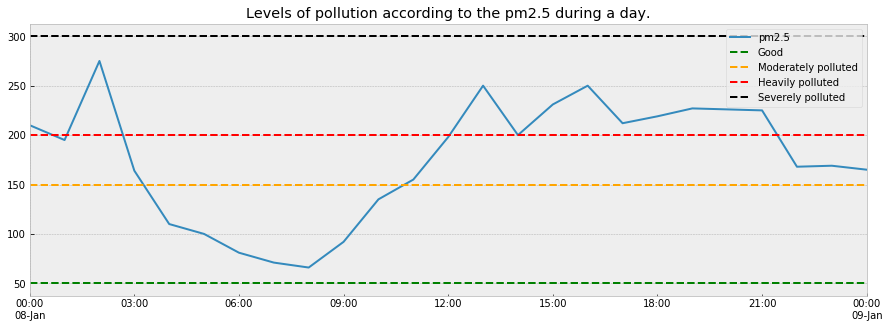

In [10]:
for i in range(1, 9) :
    plt.figure()
    start, stop = '2010-01-0{} 00:00:00'.format(i), '2010-01-0{} 00:00:00'.format(i+1)
    ax = full_train[start:stop]["pm2.5"].plot(figsize=(15, 5))
    ax.axhline(50, color='g', linestyle='--', label = 'Good')
    ax.axhline(150, color='orange', linestyle='--', label = 'Moderately polluted')
    ax.axhline(200, color='red', linestyle='--', label = 'Heavily polluted')
    ax.axhline(300, color='black', linestyle='--', label = 'Severely polluted')
    plt.title('Levels of pollution according to the pm2.5 during a day.')
    plt.legend()
    plt.show()
    plt.close()

## Let's have a look at the evolution of pm2.5 during a month

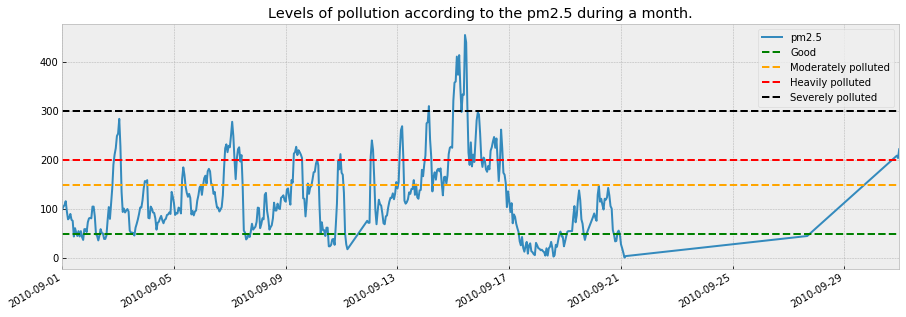

In [11]:
start, stop = '2010-09-01', '2010-09-30'
ax = full_train[start:stop]["pm2.5"].plot(figsize=(15, 5))
ax.axhline(50, color='g', linestyle='--', label = 'Good')
ax.axhline(150, color='orange', linestyle='--', label = 'Moderately polluted')
ax.axhline(200, color='red', linestyle='--', label = 'Heavily polluted')
ax.axhline(300, color='black', linestyle='--', label = 'Severely polluted')
plt.title('Levels of pollution according to the pm2.5 during a month.')
plt.legend()

## Let's have a look at the evolution of pm2.5 during a year

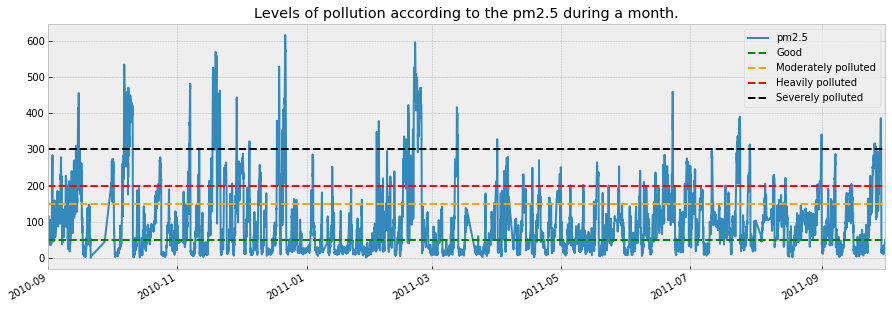

In [12]:
start, stop = '2010-09-01', '2011-09-30'
ax = full_train[start:stop]["pm2.5"].plot(figsize=(15, 5))
ax.axhline(50, color='g', linestyle='--', label = 'Good')
ax.axhline(150, color='orange', linestyle='--', label = 'Moderately polluted')
ax.axhline(200, color='red', linestyle='--', label = 'Heavily polluted')
ax.axhline(300, color='black', linestyle='--', label = 'Severely polluted')
plt.title('Levels of pollution according to the pm2.5 during a month.')
plt.legend()

Remarks :
    - at the scale of a day, we don't see most of the time big variations
    - during a month the variations are big
    - we don't see any visual trends

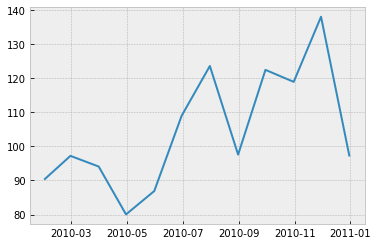

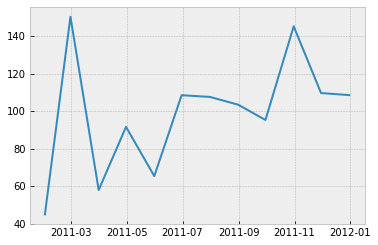

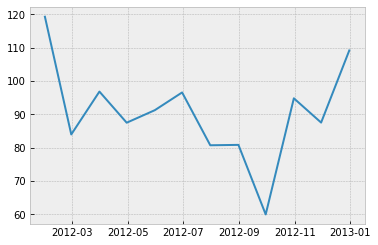

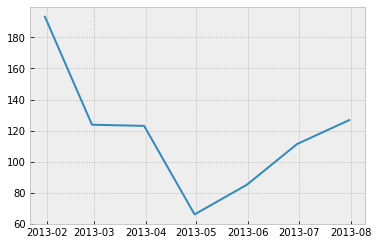

In [13]:
y_train_month = full_train["pm2.5"].groupby(pd.Grouper(freq="M")).mean()  # DataFrameGroupBy (grouped by Month)
i = 0
while i < len(y_train_month):
    plt.figure()
    plt.plot(y_train_month[i:i+12])
    i += 12

In [14]:
# Building labels of gravity 
grav_levels = np.zeros(full_train.shape[0])
for i in range(full_train.shape[0]) :
    if full_train['pm2.5'][i] < 50 :
        grav_levels[i] = 1
    elif full_train['pm2.5'][i] >= 50 and full_train['pm2.5'][i] < 150 :
        grav_levels[i] = 2
    elif full_train['pm2.5'][i] >= 150 and full_train['pm2.5'][i] < 200 :
        grav_levels[i] = 3
    elif full_train['pm2.5'][i] >= 200 and full_train['pm2.5'][i] < 300 :
        grav_levels[i] = 4
    else :
        grav_levels[i] = 5
        
full_train['Level of pollution'] = pd.Series(grav_levels, index=full_train.index)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

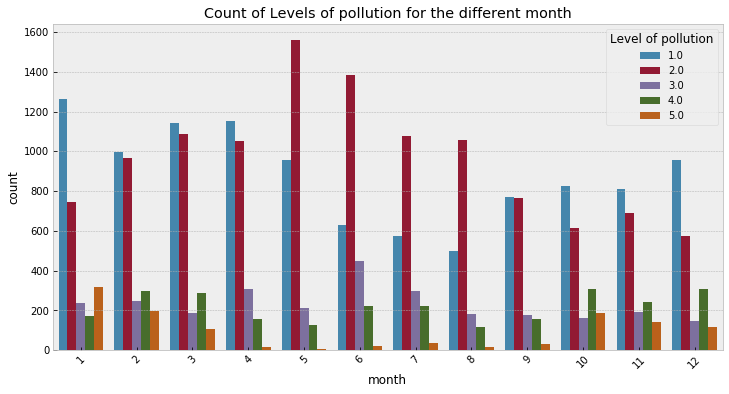

In [15]:
plt.figure(figsize = (12, 6))
plt.title('Count of Levels of pollution for the different month')
sns.countplot(x = 'month' , hue='Level of pollution', data = full_train)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

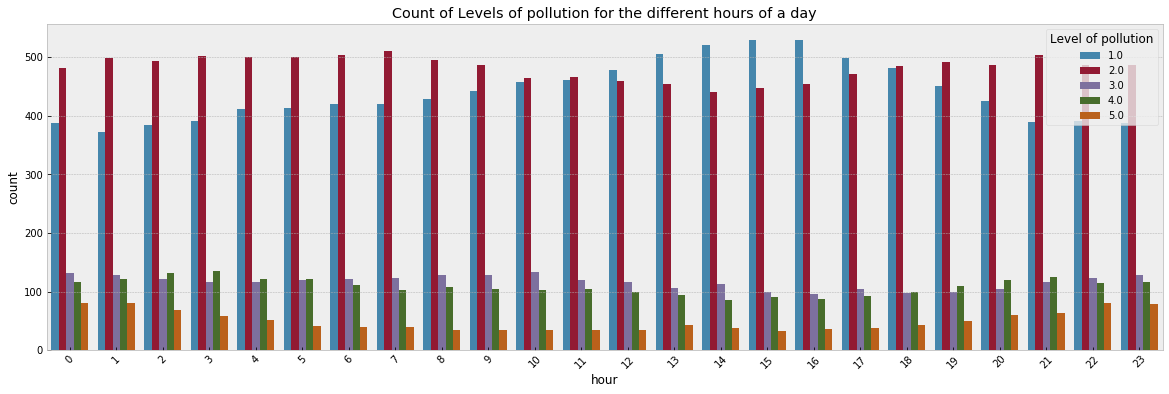

In [16]:
plt.figure(figsize = (20, 6))
plt.title('Count of Levels of pollution for the different hours of a day')
sns.countplot(x = 'hour' , hue='Level of pollution', data = full_train)
plt.xticks(rotation=45)

$\textbf{Observations :}$

During the three years study we see a kind of seasonality :
    - very high levels of pollution (Heavily polluted and Severely polluted) are more likely to be observed in a cold weather : from october to february and during the night : from 20 to 4 oclock.
    - from the end of May to the end of the summer, we are more likely to observe moderately high values of pm2.5.
    - the mean value of the pm2.5 doesn't vary much from a year to another 

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

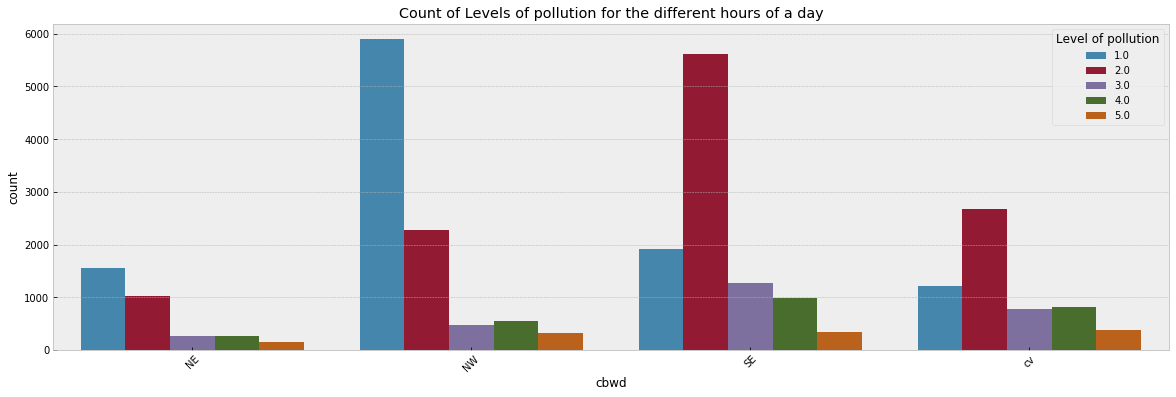

In [17]:
plt.figure(figsize = (20, 6))
plt.title('Count of Levels of pollution for the different hours of a day')
sns.countplot(x = 'cbwd' , hue='Level of pollution', data = full_train)
plt.xticks(rotation=45)

# Analysis of the quantitative features

In [18]:
data_quant.describe()

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,28756.000000,28756.000000,28756.000000,28756.000000,28756.000000,28756.000000,28756.000000
mean,100.790409,1.253617,11.562596,1016.592955,25.510508,0.070038,0.212408
std,93.144220,14.346522,12.363157,10.419822,50.472095,0.853704,1.520607
min,0.000000,-29.000000,-19.000000,992.000000,0.450000,0.000000,0.000000
25%,29.000000,-11.000000,0.000000,1008.000000,1.790000,0.000000,0.000000
50%,75.000000,1.000000,12.000000,1016.000000,6.260000,0.000000,0.000000
75%,142.000000,15.000000,23.000000,1025.000000,24.590000,0.000000,0.000000
max,994.000000,28.000000,41.000000,1046.000000,565.490000,27.000000,36.000000


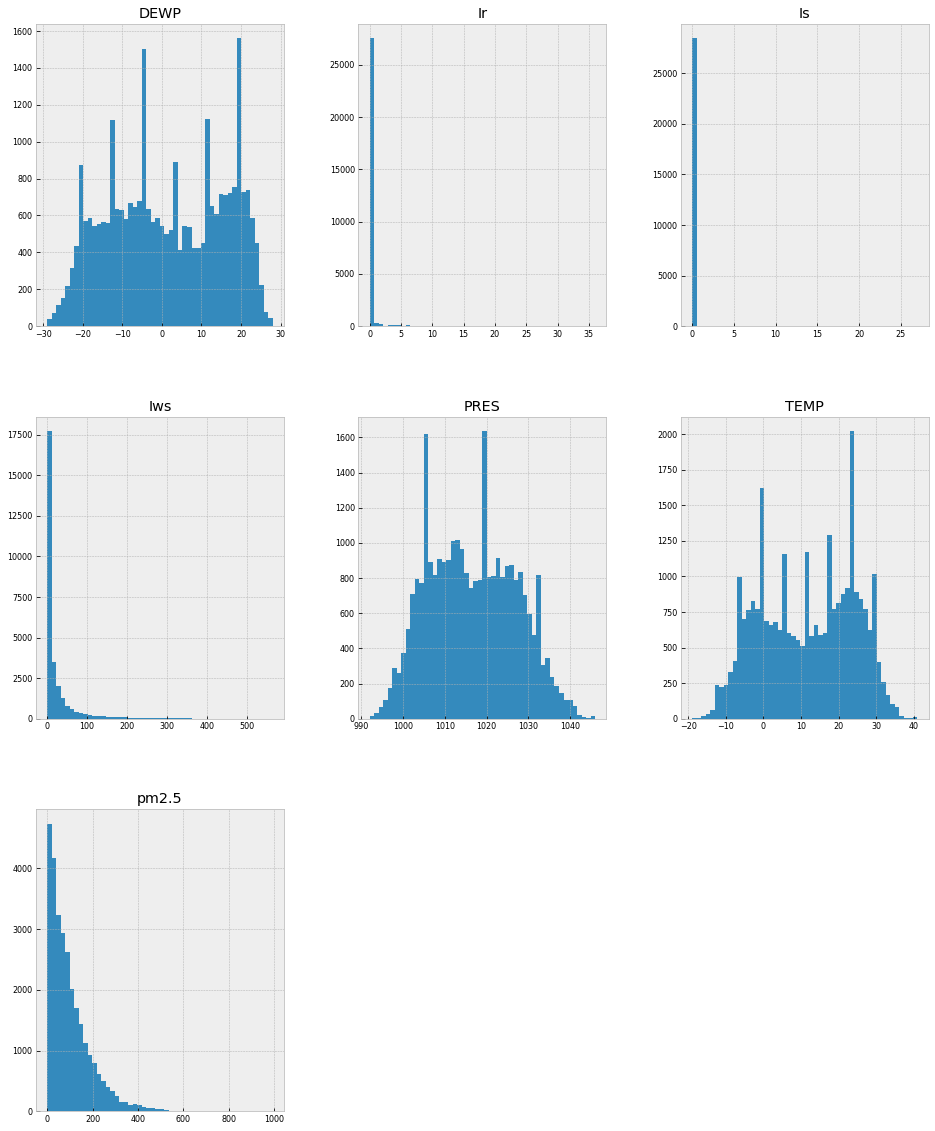

In [19]:
data_quant.hist(figsize=(16, 20), bins = 50, xlabelsize=8, ylabelsize=8)
plt.title('Histogram representing the distribution of each quantitative feature : ')
plt.show()

Remarks :
- very few hours of cumulated snow and cumulated rain,
- Iws, pm2.5 centered around 0

Text(0.5, 1.0, 'Anlaysis of correlations via heatmap')

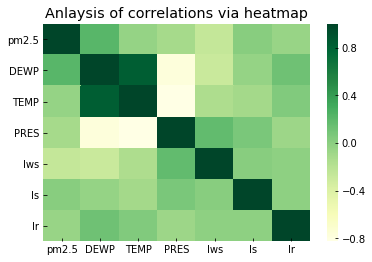

In [20]:
# Analysis of correlations via heatmap
sns.heatmap(data_quant.corr(), cmap='YlGn')
plt.title('Anlaysis of correlations via heatmap')

The most correlated features with our target pm2.5 are DEWP and Is.
DEWP is also really correlated to te temperature.

# Features importances

Now that we have seen if there were linear relationships between our target and the features via a correlation with the correlation map, we use non linear models (boosting models here) to analyse whether there are some strong non linear relationships

In [21]:
# We first dummify the features
X_train_dummified = X_train.drop(columns=['year', 'month', 'day', 'hour'])
print(cat_cols)
cat_cols_bis = cat_cols.copy()
cat_cols_bis.remove('year')
cat_cols_bis.remove('hour')
cat_cols_bis.remove('day')
cat_cols_bis.remove('month')
print(cat_cols_bis)

['year', 'month', 'day', 'hour', 'cbwd']
['cbwd']


In [22]:
print(X_train_dummified.columns)
print(X_train_dummified.shape)
X_train_dummified = pd.get_dummies(X_train_dummified, columns=cat_cols_bis, dtype='int64')
X_train_dummified.head()

Index(['DEWP', 'TEMP', 'PRES', 'cbwd', 'Iws', 'Is', 'Ir'], dtype='object')
(28756, 7)


,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_cv
2010-01-02 00:00:00,-16,-4.0,1020.0,1.79,0,0,0,0,1,0
2010-01-02 01:00:00,-15,-4.0,1020.0,2.68,0,0,0,0,1,0
2010-01-02 02:00:00,-11,-5.0,1021.0,3.57,0,0,0,0,1,0
2010-01-02 03:00:00,-7,-5.0,1022.0,5.36,1,0,0,0,1,0
2010-01-02 04:00:00,-7,-5.0,1022.0,6.25,2,0,0,0,1,0


In [23]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train_dummified, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

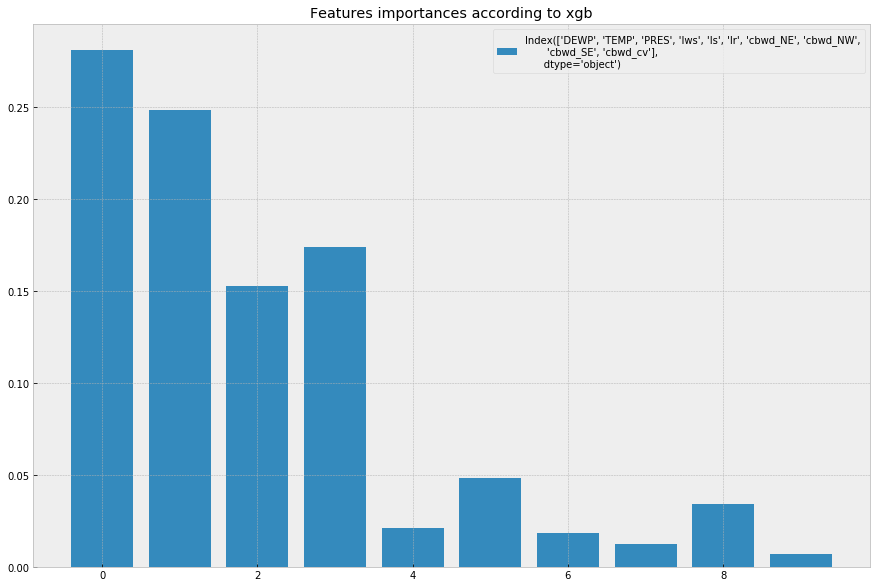

In [24]:
plt.figure(figsize=(15, 10))
plt.bar(range(len(xgb.feature_importances_)), xgb.feature_importances_, label = X_train_dummified.columns)
plt.legend()
plt.title('Features importances according to xgb')
plt.show()

The output seems particularly linked to the 'DEWP' (dewpoint) and the 'TEMP' (temperature).

## Workflow

<img src="https://github.com/Nicotous1/ChinaPollution/raw/master/img/workflow.png" width="100%">

## The model to submit

The estimated future values of the variables are available for free on a hourly basis by the meteorological institutes in Beijing and up to a 15 days horizon. 
The goal of this challenge is to develop a predictive workflow that can predict the level of pollution in the following days given the estimated values of the variables produced by meteorological institutes. 
Since the data have an hourly basis, one might compute means of the features and of the PM2.5 concentration on each half-day before or after the prediction task.

The predictions of the workflow will help the company to reduce the generated monetary costs which is the KPI in the present case. 
From a modeling viewpoint, the problem is an ordered classification problem with one of the following loss functions: 
$$
\sum_{t=1}^T(Y_t-g(t)^2)
$$
or
$$
max(0, Y_t-g(t))
$$
with $g(t)$ the considered predictor and $t$ the time index, here the half-day for which the prediction is made.  

Given that adapting its infrastructures might be done by the company something like two-times a day maximum, the model will be retrained at noon and midnight every day. It will be enriched by the previous data collected. 
As the stakes are high, the conclusions derived by the model should not be implemented in a fully automated fashion, but rather help the company to adapt its transportation supply.

As mentioned above, the KPI and the loss crucially hinges on the hypothesis that each person that could not take her car will take public transportation. One can imagine that some people will work from home for instance. Hire experts to estimate the elasticity of public transportation to driving interdiction could be a good idea. The increase in commuters flow might be better estimated and included in the loss function. 